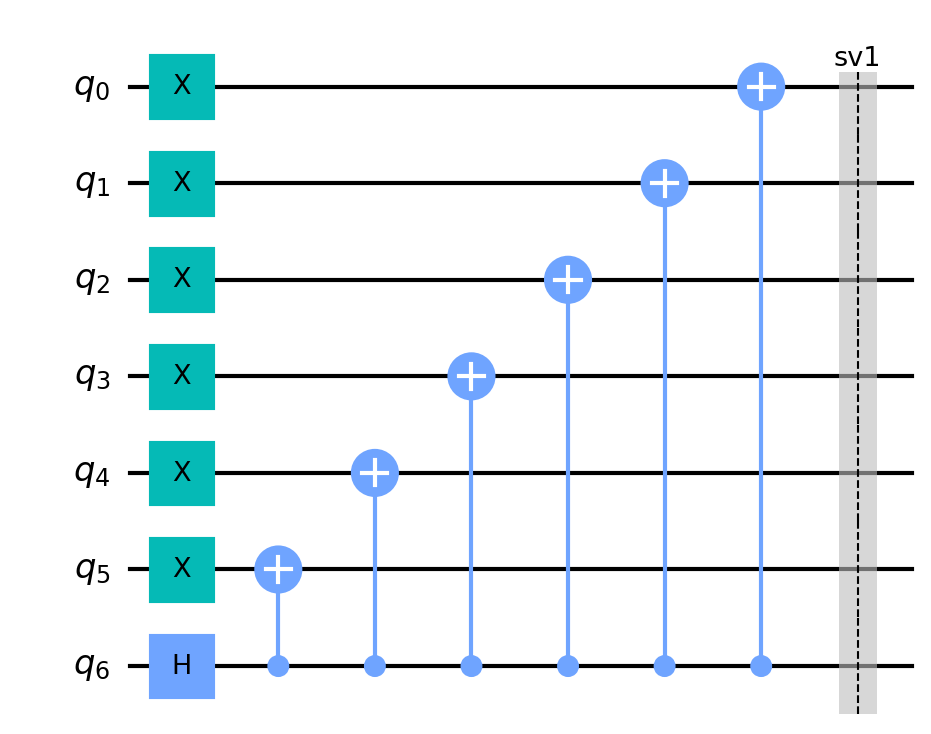

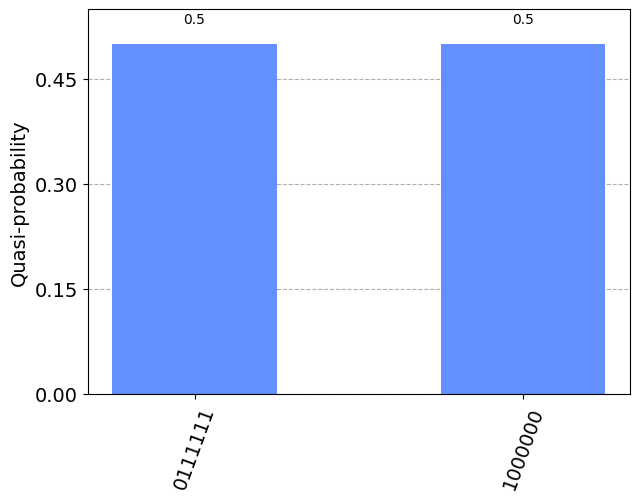

In [19]:
"""quantum_circuit2.ipynb"""
# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

from __future__ import annotations

import typing

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Using the state vector simulator since no measurements are being taken
backend: Any = Aer.get_backend("statevector_simulator")
# This states that there will be 7 qubits in the circuit
qc: Any = QuantumCircuit(7)

"""This circuit has a 50/50 chance to produce the decimal numbers 63 or 64 but 
in their binary representation: 0111111 or 1000000. I accomplished this by applying
a Hadamard gate to q6 and Not gates to every other qubit. Then I entangle q0 through
q5 with q6. This means that if the superposition of q6 settles to 0, then none of
the other qubits will be affected by the CNOT gates and will be 1 at the end, resulting
in 0111111 (63). However, if q6 settles to 1 when it is measured, then the CNOT gates 
flip every other qubit from 1 to 0 so we are left with 1000000 (64)."""
qc.h(6) # H gate applied to q6
qc.x(5) # Not gate applied to q5
qc.x(4) # Not gate applied to q4
qc.x(3) # Not gate applied to q3
qc.x(2) # Not gate applied to q2
qc.x(1) # Not gate applied to q1
qc.x(0) # Not gate applied to q0

# Entangle every other qubit with q6 using CNOT gates.
qc.cx(6, 5)
qc.cx(6, 4)
qc.cx(6, 3)
qc.cx(6, 2)
qc.cx(6, 1)
qc.cx(6, 0)


# Do not modify the following code
qc.save_statevector("sv1")
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore